In [1]:
import pickle
import pandas as pd

pd.set_option('display.max_columns', 10000)
pd.set_option('display.width', 10000)

with open('data.pkl','rb') as file:
    train_data=pickle.load(file)    #pickle方式读取速度会更快
train_data    #把刚才处理的数据给打印出来了！

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer Full Name,order_year,order_month,order_week_day,order_hour,order_month_year
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,2018-01-31 22:56:00,77202,1360,13.110000,0.04,180517,327.750000,0.29,1,327.750000,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class,CallyHolloway,2018,1,2,22,2018-01
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,2018-01-13 12:27:00,75939,1360,16.389999,0.05,179254,327.750000,-0.80,1,327.750000,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class,IreneLuna,2018,1,5,12,2018-01
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,2018-01-13 12:06:00,75938,1360,18.030001,0.06,179253,327.750000,-0.80,1,327.750000,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class,GillianMaldonado,2018,1,5,12,2018-01
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,2018-01-13 11:45:00,75937,1360,22.940001,0.07,179252,327.750000,0.08,1,327.750000,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class,TanaTate,2018,1,5,11,2018-01
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,2018-01-13 11:24:00,75936,1360,29.500000,0.09,179251,327.750000,0.45,1,327.750000,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class,OrliHendricks,2018,1,5,11,2018-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,EE. UU.,XXXXXXXXX,Maria,1005,Peterson,XXXXXXXXX,Home Office,NY,1322 Broad Glade,11207.0,7,Fan Shop,40.640930,-73.942711,Pa

In [2]:
import numpy as np
train_data['fraud']=np.where( train_data['Order Status']=='SUSPECTED_FRAUD',1,0)
print("train_data中fruad总数",train_data['fraud'].sum())
train_data['fraud']#18万个订单中 有4062个订单是欺诈行为

train_data中fruad总数 4062


0         0
1         0
2         0
3         0
4         0
         ..
180514    0
180515    0
180516    0
180517    0
180518    0
Name: fraud, Length: 180519, dtype: int64

In [3]:
train_data.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer', 'Delivery Status', 'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City', 'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id', 'Customer Lname', 'Customer Password', 'Customer Segment', 'Customer State', 'Customer Street', 'Customer Zipcode', 'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market', 'Order City', 'Order Country', 'Order Customer Id', 'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status', 'Order Zipcode', 'Product Card Id', 'Product Category Id', 'Product Description', 'Product Image', 'Product Name', 'Product Price', 'Product Status', 'shipping date (Da

In [4]:
#看一下延迟发货的数据情况
train_data['Delivery Status'].value_counts()#可以看到延迟发货还是很常见的

Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: Delivery Status, dtype: int64

In [5]:
train_data['Late delivery']=np.where( train_data['Delivery Status']=='Late delivery',1,0)#延迟发货是0，不是延迟发货就是1
train_data['Late delivery'] #这两个字段就搭建完了

0         0
1         1
2         0
3         0
4         0
         ..
180514    0
180515    1
180516    1
180517    0
180518    0
Name: Late delivery, Length: 180519, dtype: int64

In [6]:
#标签fraud和Late delivery搭建完了，把Order Status 和Delivery Status  这两个给删除了 ，
#因为标签就是从他们身上来的，不删除他们训练的模型会是全满分，标签泄漏   还有那个Late_delivery_risk
train_data.drop(['Order Status','Delivery Status','Late_delivery_risk'],axis=1,inplace=True)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 58 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180519 non-null  object        
 1   Days for shipping (real)       180519 non-null  int64         
 2   Days for shipment (scheduled)  180519 non-null  int64         
 3   Benefit per order              180519 non-null  float64       
 4   Sales per customer             180519 non-null  float64       
 5   Category Id                    180519 non-null  int64         
 6   Category Name                  180519 non-null  object        
 7   Customer City                  180519 non-null  object        
 8   Customer Country               180519 non-null  object        
 9   Customer Email                 180519 non-null  object        
 10  Customer Fname                 180519 non-null  object        
 11  

In [8]:
#把数据里面类型是object找出来
categeorical_cols=train_data.select_dtypes(include='object').columns
categeorical_cols

Index(['Type', 'Category Name', 'Customer City', 'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Lname', 'Customer Password', 'Customer Segment', 'Customer State', 'Customer Street', 'Department Name', 'Market', 'Order City', 'Order Country', 'Order Region', 'Order State', 'Product Image', 'Product Name', 'shipping date (DateOrders)', 'Shipping Mode', 'Customer Full Name'], dtype='object')

In [9]:
#可以看到数据里面'Customer Password'和Customer Emailz这两列全是XXXXXXXX，就删掉吧！ 可以数据先探索试试
print(train_data['Customer Password'].value_counts())
print(train_data['Customer Email'].value_counts()) #核对完毕 可以删除了

XXXXXXXXX    180519
Name: Customer Password, dtype: int64
XXXXXXXXX    180519
Name: Customer Email, dtype: int64


In [10]:
print("删除这几个特征之前数据特征的个数:{}".format( len(train_data.columns )       )        )
#同理可以探索一下其他的数据，这次把一些其他的没有用的给删除 经过探索有如下几个
train_data.drop(['Customer Email','Customer Password','Product Description','Product Image','Customer Fname','Customer Lname','Product Status'],axis=1,inplace=True)
print("删除后数据特征的个数{}".format(len(train_data.columns)  ))
#可以看到 删除了7个杂碎

删除这几个特征之前数据特征的个数:58
删除后数据特征的个数51


In [11]:
#除此之外可以通过相关性的热力图 把相关性很高的 给删除一部分
train_data.drop(['Order Customer Id','Order Item Cardprod Id','Order Item Id','Sales per customer','Order Item Total',
                 'Order Profit Per Order','Product Card Id',
                 'Product Category Id',  'Product Price','order date (DateOrders)','order_month_year'],axis=1,inplace=True)
print("再删除几个之后的个数{}".format(len(train_data.columns)  ))

再删除几个之后的个数40


In [12]:
pd.set_option('display.max_rows', 10)
train_data['Order Zipcode'].value_counts()#可以看到它缺失值太多了，也需要把它给删除

10035.0    648
10009.0    550
10024.0    541
94122.0    526
10011.0    463
          ... 
59801.0      1
60477.0      1
31088.0      1
61832.0      1
30188.0      1
Name: Order Zipcode, Length: 609, dtype: int64

In [13]:
train_data.drop(['Order Zipcode','Customer Street','shipping date (DateOrders)','Latitude','Longitude'],axis=1,inplace=True)
print("再删除几个之后的个数{}".format(len(train_data.columns)  ))

再删除几个之后的个数35


In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Category Id                    180519 non-null  int64  
 5   Category Name                  180519 non-null  object 
 6   Customer City                  180519 non-null  object 
 7   Customer Country               180519 non-null  object 
 8   Customer Id                    180519 non-null  int64  
 9   Customer Segment               180519 non-null  object 
 10  Customer State                 180519 non-null  object 
 11  Customer Zipcode               180519 non-null  float64
 12  Department Id                 

In [15]:
#查看分类类型
categorical_clos=train_data.select_dtypes(include='object').columns
categorical_clos        #categeorical_cols

Index(['Type', 'Category Name', 'Customer City', 'Customer Country', 'Customer Segment', 'Customer State', 'Department Name', 'Market', 'Order City', 'Order Country', 'Order Region', 'Order State', 'Product Name', 'Shipping Mode', 'Customer Full Name'], dtype='object')

In [16]:
train_data[categorical_clos]

,Type,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Department Name,Market,Order City,Order Country,Order Region,Order State,Product Name,Shipping Mode,Customer Full Name
0,DEBIT,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Bekasi,Indonesia,Southeast Asia,Java Occidental,Smart watch,Standard Class,CallyHolloway
1,TRANSFER,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Bikaner,India,South Asia,Rajastán,Smart watch,Standard Class,IreneLuna
2,CASH,Sporting Goods,San Jose,EE. UU.,Consumer,CA,Fitness,Pacific Asia,Bikaner,India,South Asia,Rajastán,Smart watch,Standard Class,GillianMaldonado
3,DEBIT,Sporting Goods,Los Angeles,EE. UU.,Home Office,CA,Fitness,Pacific Asia,Townsville,Australia,Oceania,Queensland,Smart watch,Standard Class,TanaTate
4,PAYMENT,Sporting Goods,Caguas,Puerto Rico,Corporate,PR,Fitness,Pacific Asia,Townsville,Australia,Oceania,Queensland,Smart watch,Standard Class,OrliHendricks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,Fishing,Brooklyn,EE. UU.,Home Office,NY,Fan Shop,Pacific Asia,Shanghái,China,Eastern Asia,Shanghái,Field & Stream Sportsman 16 Gun Fire Safe,Standard Class,MariaPeterson
180515,DEBIT,Fishing,Bakersfield,EE. UU.,Corporate,CA,Fan Shop,Pacific Asia,Hirakata,Japón,Eastern Asia,Osaka,Field & Stream Sportsman 16 Gun Fire Safe,Second Class,RonaldClark
180516,TRANSFER,Fishing,Bristol,EE. UU.,Corporate,CT,Fan Shop,Pacific Asia,Adelaide,Australia,Oceania,Australia del Sur,Field & Stream Sportsman 16 Gun Fire Safe,Standard Class,JohnSmith
180517,PAYMENT,Fishing,Caguas,Puerto Rico,Consumer,PR,Fan Shop,Pacific Asia,Adelaide,Australia,Oceania,Australia del Sur,Field & Stream Sportsman 16 Gun Fire Safe,Standard Class,MarySmith


In [17]:
train_data['Customer Full Name'].isnull().sum() #有8个缺失值

8

In [18]:
#缺失值直接给去掉
train_data=train_data.dropna(subset=['Customer Full Name'])

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for cat in categorical_clos:
    train_data[cat]=le.fit_transform(train_data[cat])
train_data[categorical_clos]    
#这样就做LabelEncoder了

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Type,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Department Name,Market,Order City,Order Country,Order Region,Order State,Product Name,Shipping Mode,Customer Full Name
0,1,40,66,1,0,36,4,3,331,70,15,475,78,3,1875
1,3,40,66,1,0,36,4,3,391,69,13,841,78,3,5374
2,0,40,452,0,0,5,4,3,391,69,13,841,78,3,4426
3,1,40,285,0,2,5,4,3,3226,8,11,835,78,3,12922
4,2,40,66,1,1,36,4,3,3226,8,11,835,78,3,10632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,0,18,59,0,2,31,3,3,2922,31,7,913,24,3,8421
180515,1,18,26,0,1,5,3,3,1362,77,7,770,24,2,11672
180516,3,18,55,0,1,7,3,3,25,8,11,88,24,3,6296
180517,2,18,66,1,0,36,3,3,25,8,11,88,24,3,9379


In [20]:
#得到所有的数值类型
numerical_columns=train_data.columns.tolist()
for x in categorical_clos.tolist():
    numerical_columns.remove(x)
numerical_columns    #这些类型就是数值类型，有了这些之后可以后续为他处理

['Days for shipping (real)',
 'Days for shipment (scheduled)',
 'Benefit per order',
 'Category Id',
 'Customer Id',
 'Customer Zipcode',
 'Department Id',
 'Order Id',
 'Order Item Discount',
 'Order Item Discount Rate',
 'Order Item Product Price',
 'Order Item Profit Ratio',
 'Order Item Quantity',
 'Sales',
 'order_year',
 'order_month',
 'order_week_day',
 'order_hour',
 'fraud',
 'Late delivery']

In [21]:
x_fraud=train_data.loc[:,train_data.columns!='fraud']
y_fraud=train_data['fraud']
print(y_fraud)
print("-"*100)
x_fraud

0         0
1         0
2         0
3         0
4         0
         ..
180514    0
180515    0
180516    0
180517    0
180518    0
Name: fraud, Length: 180511, dtype: int64
----------------------------------------------------------------------------------------------------


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Zipcode,Department Id,Department Name,Market,Order City,Order Country,Order Id,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Region,Order State,Product Name,Shipping Mode,Customer Full Name,order_year,order_month,order_week_day,order_hour,Late delivery
0,1,3,4,91.250000,73,40,66,1,20755,0,36,725.0,2,4,3,331,70,77202,13.110000,0.04,327.750000,0.29,1,327.750000,15,475,78,3,1875,2018,1,2,22,0
1,3,5,4,-249.089996,73,40,66,1,19492,0,36,725.0,2,4,3,391,69,75939,16.389999,0.05,327.750000,-0.80,1,327.750000,13,841,78,3,5374,2018,1,5,12,1
2,0,4,4,-247.779999,73,40,452,0,19491,0,5,95125.0,2,4,3,391,69,75938,18.030001,0.06,327.750000,-0.80,1,327.750000,13,841,78,3,4426,2018,1,5,12,0
3,1,3,4,22.860001,73,40,285,0,19490,2,5,90027.0,2,4,3,3226,8,75937,22.940001,0.07,327.750000,0.08,1,327.750000,11,835,78,3,12922,2018,1,5,11,0
4,2,2,4,134.210007,73,40,66,1,19489,1,36,725.0,2,4,3,3226,8,75936,29.500000,0.09,327.750000,0.45,1,327.750000,11,835,78,3,10632,2018,1,5,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,0,4,4,40.000000,45,18,59,0,1005,2,31,11207.0,7,3,3,2922,31,26043,0.000000,0.00,399.980011,0.10,1,399.980011,7,913,24,3,8421,2016,1,5,3,0
180515,1,3,2,-613.770019,45,18,26,0,9141,1,5,93304.0,7,3,3,1362,77,26037,4.000000,0.01,399.980011,-1.55,1,399.980011,7,770,24,2,11672,2016,1,5,1,1
180516,3,5,4,141.110001,45,18,55,0,291,1,7,6010.0,7,3,3,25,8,26024,8.000000,0.02,399.980011,0.36,1,399.980011,11,88,24,3,6296,2016,1,4,21,1
180517,2,3,4,186.229996,45,18,66,1,2813,0,36,725.0,7,3,3,25,8,26022,12.000000,0.03,399.980011,0.48,1,399.980011,11,88,24,3,9379,2016,1,4,20,0


In [22]:
x_late=train_data.loc[:,train_data.columns!='Late delivery']
y_late=train_data['Late delivery']
print(y_fraud)
print("-"*100)
x_fraud

0         0
1         0
2         0
3         0
4         0
         ..
180514    0
180515    0
180516    0
180517    0
180518    0
Name: fraud, Length: 180511, dtype: int64
----------------------------------------------------------------------------------------------------


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Zipcode,Department Id,Department Name,Market,Order City,Order Country,Order Id,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Region,Order State,Product Name,Shipping Mode,Customer Full Name,order_year,order_month,order_week_day,order_hour,Late delivery
0,1,3,4,91.250000,73,40,66,1,20755,0,36,725.0,2,4,3,331,70,77202,13.110000,0.04,327.750000,0.29,1,327.750000,15,475,78,3,1875,2018,1,2,22,0
1,3,5,4,-249.089996,73,40,66,1,19492,0,36,725.0,2,4,3,391,69,75939,16.389999,0.05,327.750000,-0.80,1,327.750000,13,841,78,3,5374,2018,1,5,12,1
2,0,4,4,-247.779999,73,40,452,0,19491,0,5,95125.0,2,4,3,391,69,75938,18.030001,0.06,327.750000,-0.80,1,327.750000,13,841,78,3,4426,2018,1,5,12,0
3,1,3,4,22.860001,73,40,285,0,19490,2,5,90027.0,2,4,3,3226,8,75937,22.940001,0.07,327.750000,0.08,1,327.750000,11,835,78,3,12922,2018,1,5,11,0
4,2,2,4,134.210007,73,40,66,1,19489,1,36,725.0,2,4,3,3226,8,75936,29.500000,0.09,327.750000,0.45,1,327.750000,11,835,78,3,10632,2018,1,5,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,0,4,4,40.000000,45,18,59,0,1005,2,31,11207.0,7,3,3,2922,31,26043,0.000000,0.00,399.980011,0.10,1,399.980011,7,913,24,3,8421,2016,1,5,3,0
180515,1,3,2,-613.770019,45,18,26,0,9141,1,5,93304.0,7,3,3,1362,77,26037,4.000000,0.01,399.980011,-1.55,1,399.980011,7,770,24,2,11672,2016,1,5,1,1
180516,3,5,4,141.110001,45,18,55,0,291,1,7,6010.0,7,3,3,25,8,26024,8.000000,0.02,399.980011,0.36,1,399.980011,11,88,24,3,6296,2016,1,4,21,1
180517,2,3,4,186.229996,45,18,66,1,2813,0,36,725.0,7,3,3,25,8,26022,12.000000,0.03,399.980011,0.48,1,399.980011,11,88,24,3,9379,2016,1,4,20,0


In [23]:
#数据集切分
from sklearn.model_selection import train_test_split
x_fraud_train,x_fraud_test,y_fraud_train,y_fraud_test=train_test_split(x_fraud,y_fraud,test_size=0.2)
x_late_train,x_late_test,y_late_train,y_late_test=train_test_split(x_late,y_late,test_size=0.2)

In [24]:
#数据规范化一下
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_fraud_train=sc.fit_transform(x_fraud_train)
x_fraud_test=sc.transform(x_fraud_test)

x_late_train=sc.fit_transform(x_late_train)
x_late_test=sc.transform(x_late_test)

In [25]:
accuracy_list={}
recall_list={}
auc_list={}
f1_list={}

from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix,f1_score
#定义一个模型函数
def model_stats(model,x_train,x_test,y_train,y_test,name='Fraud'):
    model=model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    
    accuracy=accuracy_score(y_pred,y_test)
    recall=recall_score(y_pred,y_test)
    auc=roc_auc_score(y_pred,y_test)   
    f1=f1_score(y_pred,y_test)   
    
    accuracy_list[name,model]={accuracy}
    recall_list[name,model]={recall}
    auc_list[name,model]={auc}
    f1_list[name,model]={f1}
    
    confusion=confusion_matrix(y_pred,y_test)
    print("预测:{}".format(name),'-'*80)
    print("使用的模型：{}".format(model))
    print("准确率：{}".format(accuracy))
    print("召回率：{}".format(recall))
    print("Auc：{}".format(auc))
    print("F1-score：{}".format(f1))
    print("混淆矩阵：\n{}".format(confusion))
    print("预测:{}".format(name),'-'*80)

In [26]:
#逻辑回归模型
from sklearn.linear_model import LogisticRegression
model_fraud=LogisticRegression()
model_late=LogisticRegression()

model_stats(model_fraud,x_fraud_train,x_fraud_test,y_fraud_train,y_fraud_test,'fraud')
model_stats(model_late,x_late_train,x_late_test,y_late_train,y_late_test,'late')

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


预测:fraud --------------------------------------------------------------------------------
使用的模型：LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
准确率：0.9778134781043126
召回率：0.5357142857142857
Auc：0.7588404514935955
F1-score：0.31007751937984496
混淆矩阵：
[[35122   645]
 [  156   180]]
预测:fraud --------------------------------------------------------------------------------
预测:late --------------------------------------------------------------------------------
使用的模型：LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [27]:
#LR，GaussianNB，LinearSVC，KNeighborsClassifier，LinearDiscriminantAnalysis，
#DecisionTreeClassifier，RandomForestClassifier，XGBClassifier
#先把这些包导入一下
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,GradientBoostingClassifier,GradientBoostingRegressor

In [28]:
#使用一下高斯朴素贝叶斯方法预测一下
model_fraud_Gauss=GaussianNB()
model_late_Gauss=GaussianNB()
model_stats(model_fraud_Gauss,x_fraud_train,x_fraud_test,y_fraud_train,y_fraud_test,'fraud')
model_stats(model_late_Gauss,x_late_train,x_late_test,y_late_train,y_late_test,'late')

预测:fraud --------------------------------------------------------------------------------
使用的模型：GaussianNB(priors=None, var_smoothing=1e-09)
准确率：0.8790959200066476
召回率：0.15895953757225434
Auc：0.5794797687861272
F1-score：0.2743142144638404
混淆矩阵：
[[30913     0]
 [ 4365   825]]
预测:fraud --------------------------------------------------------------------------------
预测:late --------------------------------------------------------------------------------
使用的模型：GaussianNB(priors=None, var_smoothing=1e-09)
准确率：0.5703681134531756
召回率：0.5604828426511008
Auc：0.7802414213255504
F1-score：0.7183454086542826
混淆矩阵：
[[  812     0]
 [15511 19780]]
预测:late --------------------------------------------------------------------------------


In [29]:
#使用一下SVM预测一下
from sklearn import svm
model_fraud_svm=svm.LinearSVC()
model_late_svm=svm.LinearSVC()
model_stats(model_fraud_svm,x_fraud_train,x_fraud_test,y_fraud_train,y_fraud_test,'fraud')
model_stats(model_late_svm,x_late_train,x_late_test,y_late_train,y_late_test,'late')

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


预测:fraud --------------------------------------------------------------------------------
使用的模型：LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
准确率：0.9775364928122316
召回率：0.5241379310344828
Auc：0.7526729361424334
F1-score：0.2726457399103139
混淆矩阵：
[[35140   673]
 [  138   152]]
预测:fraud --------------------------------------------------------------------------------
预测:late --------------------------------------------------------------------------------
使用的模型：LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
准确率：0.9883389192033903
召回率：0.9791594475521014
Auc：0.9895797237760506
F1-score：0.9894699982491684
混淆矩阵：
[[15902     0]
 [  421

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [30]:
#决策树模型
model_fraud_DTC=DecisionTreeClassifier()
model_late_DTC=DecisionTreeClassifier()
model_stats(model_fraud_DTC,x_fraud_train,x_fraud_test,y_fraud_train,y_fraud_test,'fraud')
model_stats(model_late_DTC,x_late_train,x_late_test,y_late_train,y_late_test,'late')

预测:fraud --------------------------------------------------------------------------------
使用的模型：DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
准确率：0.9921890147633161
召回率：0.8267148014440433
Auc：0.9114011748204567
F1-score：0.8297101449275363
混淆矩阵：
[[35134   138]
 [  144   687]]
预测:fraud --------------------------------------------------------------------------------
预测:late --------------------------------------------------------------------------------
使用的模型：DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
    

In [31]:
#根据决策树模型，得到feature importance
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 10000)
pd.set_option('display.width', 10000)

important_col=model_fraud_DTC.feature_importances_.argsort()#从小到大做个排序
print(important_col)
feat_importance=pd.DataFrame({'features':x_fraud.columns[important_col],'importance':model_fraud_DTC.feature_importances_})
feat_importance

[22  2 12  7 20 13 26  4 23 29 19  5 18 21 14  3  9 24 10 30 31  6 16 32
 11 15 25  0 17 28  8 27 33  1]


,features,importance
0,Order Item Quantity,0.060263
1,Days for shipment (scheduled),0.117567
2,Department Id,0.000632
3,Customer Country,0.011895
4,Order Item Product Price,0.003675
5,Department Name,0.005570
6,Product Name,0.033713
7,Category Id,0.001908
8,Sales,0.072519
9,order_year,0.013515


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text xticklabel objects>)

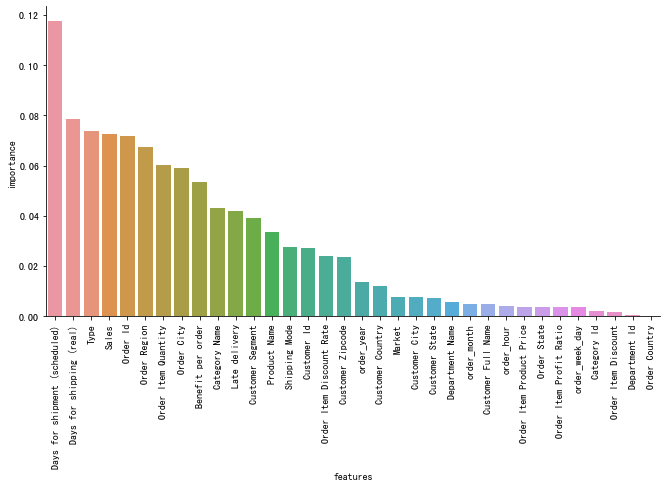

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
feat_importance=feat_importance.sort_values(by='importance',ascending=False)
sns.catplot(x='features',y='importance',data=feat_importance,kind='bar',height=5,aspect=2)
plt.xticks(rotation=90)

In [33]:
#神经网络进行分类
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

keras.layers.BatchNormalization()
classifier=Sequential()
#第一层隐藏层
classifier.add(Dense(1024,activation='relu',kernel_initializer='random_normal',input_dim=34))
#第二层隐藏层
classifier.add(Dense(512,activation='relu',kernel_initializer='random_normal'))
#第三层隐藏层
classifier.add(Dense(256,activation='relu',kernel_initializer='random_normal'))
#第4层隐藏层
classifier.add(Dense(128,activation='relu',kernel_initializer='random_normal'))
#第5层隐藏层
classifier.add(Dense(64,activation='relu',kernel_initializer='random_normal'))
#第6层隐藏层
classifier.add(Dense(32,activation='relu',kernel_initializer='random_normal'))
#第7层隐藏层
classifier.add(Dense(16,activation='relu',kernel_initializer='random_normal'))
#第8层隐藏层
classifier.add(Dense(8,activation='relu',kernel_initializer='random_normal'))
#第9层隐藏层
classifier.add(Dense(4,activation='relu',kernel_initializer='random_normal'))
#第10层隐藏层
classifier.add(Dense(2,activation='relu',kernel_initializer='random_normal'))
#输出层
classifier.add(Dense(1,activation='sigmoid',kernel_initializer='random_normal'))

#定义优化器,损失函数
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#训练
classifier.fit(x_fraud_train,y_fraud_train,batch_size=512,epochs=10)

Epoch 1/10
283/283 [==============================] - 12s 44ms/step - loss: 0.6305 - accuracy: 0.9776
Epoch 2/10
283/283 [==============================] - 13s 48ms/step - loss: 0.5221 - accuracy: 0.9776
Epoch 3/10
283/283 [==============================] - 14s 49ms/step - loss: 0.4365 - accuracy: 0.9776
Epoch 4/10
283/283 [==============================] - 15s 53ms/step - loss: 0.3692 - accuracy: 0.9776
Epoch 5/10
283/283 [==============================] - 16s 55ms/step - loss: 0.3163 - accuracy: 0.9776
Epoch 6/10
283/283 [==============================] - 14s 48ms/step - loss: 0.2745 - accuracy: 0.9776
Epoch 7/10
283/283 [==============================] - 13s 47ms/step - loss: 0.2414 - accuracy: 0.9776
Epoch 8/10
283/283 [==============================] - 14s 49ms/step - loss: 0.2149 - accuracy: 0.9776
Epoch 9/10
283/283 [==============================] - 11s 39ms/step - loss: 0.1937 - accuracy: 0.9776
Epoch 10/10
283/283 [==============================] - 12s 41ms/step - loss: 0.176

In [34]:
train_evaluate=classifier.evaluate(x_fraud_train,y_fraud_train)
test_evaluate=classifier.evaluate(x_fraud_test,y_fraud_test)
print("训练集准确率:",train_evaluate)
print("测试集准确率:",test_evaluate)

1129/1129 [==============================] - 20s 17ms/step - loss: 0.1700 - accuracy: 0.9771
训练集准确率: [0.16912348568439484, 0.9775843620300293]
测试集准确率: [0.17001070082187653, 0.977148711681366]


In [35]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [36]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
#硬投票
eclf=VotingClassifier( estimators=[('LR',model_fraud),('DCT',model_fraud_DTC)],voting='soft' )
for clf,label in zip([model_fraud,model_fraud_DTC,eclf],['LR','DCT','Voting']):
    scores=cross_val_score(clf,x_fraud,y_fraud,cv=5,scoring='roc_auc')
    print(scores.mean(),scores.std(),label)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.45998589676027796 0.0161753345919828 LR
0.803099950331682 0.04651507377331993 DCT


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.7915717267051822 0.0521920539349669 Voting


In [37]:
#KNN模型，运行速度太慢了吧，注释了
# from sklearn.neighbors import KNeighborsClassifier
# model_fraud_KNN=KNeighborsClassifier()
# model_late_KNN=KNeighborsClassifier()
# model_stats(model_fraud_KNN,x_fraud_train,x_fraud_test,y_fraud_train,y_fraud_test,'fraud')
# model_stats(model_late_KNN,x_late_train,x_late_test,y_late_train,y_late_test,'late')

In [38]:
#LDA模型
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model_fraud_LDA=LinearDiscriminantAnalysis()
model_late_LDA=LinearDiscriminantAnalysis()
model_stats(model_fraud_LDA,x_fraud_train,x_fraud_test,y_fraud_train,y_fraud_test,'fraud')
model_stats(model_late_LDA,x_late_train,x_late_test,y_late_train,y_late_test,'late')

预测:fraud --------------------------------------------------------------------------------
使用的模型：LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
准确率：0.9773980001661912
召回率：0.5069551777434312
Auc：0.7464689020486108
F1-score：0.44565217391304346
混淆矩阵：
[[34959   497]
 [  319   328]]
预测:fraud --------------------------------------------------------------------------------
预测:late --------------------------------------------------------------------------------
使用的模型：LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
准确率：0.9839071545300945
召回率：0.9762838005457702
Auc：0.9849126552264842
F1-score：0.9854513584574933
混淆矩阵：
[[15845   103]
 [  478 19677]]
预测:late --------------------------------------------------------------------------------


In [39]:
#随机森林
model_fraud_RF=RandomForestClassifier()
model_late_RF=RandomForestClassifier()
model_stats(model_fraud_RF,x_fraud_train,x_fraud_test,y_fraud_train,y_fraud_test,'fraud')
model_stats(model_late_RF,x_late_train,x_late_test,y_late_train,y_late_test,'late')

预测:fraud --------------------------------------------------------------------------------
使用的模型：RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
准确率：0.9891975736088414
召回率：0.9822616407982262
Auc：0.9857734771925609
F1-score：0.6943573667711599
混淆矩阵：
[[35270   382]
 [    8   443]]
预测:fraud --------------------------------------------------------------------------------
预测:late --------------------------------------------------------------------------------
使用的模型：RandomForestClassifier(bootstrap=True,

In [40]:
#Xgboost
import xgboost as xgb
model_fraud_RF=RandomForestClassifier()
model_late_RF=RandomForestClassifier()
model_stats(model_fraud_RF,x_fraud_train,x_fraud_test,y_fraud_train,y_fraud_test,'fraud')
model_stats(model_late_RF,x_late_train,x_late_test,y_late_train,y_late_test,'late')

预测:fraud --------------------------------------------------------------------------------
使用的模型：RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
准确率：0.9886159044954713
召回率：0.9836448598130841
Auc：0.9861602014552456
F1-score：0.6719872306464485
混淆矩阵：
[[35271   404]
 [    7   421]]
预测:fraud --------------------------------------------------------------------------------
预测:late --------------------------------------------------------------------------------
使用的模型：RandomForestClassifier(bootstrap=True,

In [41]:
#从auc的角度来看看谁更好
auc_list

{('fraud',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False)): {0.7588404514935955},
 ('late',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False)): {0.9895797237760506},
 ('fraud', GaussianNB(priors=None, var_smoothing=1e-09)): {0.5794797687861272},
 ('late', GaussianNB(priors=None, var_smoothing=1e-09)): {0.7802414213255504},
 ('fraud',
  LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
            intercep

In [42]:
train_data.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Category Id', 'Category Name', 'Customer City', 'Customer Country', 'Customer Id', 'Customer Segment', 'Customer State', 'Customer Zipcode', 'Department Id', 'Department Name', 'Market', 'Order City', 'Order Country', 'Order Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Region', 'Order State', 'Product Name', 'Shipping Mode', 'Customer Full Name', 'order_year', 'order_month', 'order_week_day', 'order_hour', 'fraud', 'Late delivery'], dtype='object')

In [44]:
#对销售量记性预测,即sales字段
x_sales=train_data.loc[:,train_data.columns!='Sales']
y_sales=train_data['Sales']

#定订单数量进行预测，即Order ItemQuantity
x_quantity=train_data.loc[:,train_data.columns!='Order Item Quantity']
y_quantity=train_data['Order Item Quantity']

In [45]:
#对数据集进行切分
x_sales_train,x_sales_test,y_sales_train,y_sales_test=train_test_split(x_sales,y_sales,test_size=0.2)
x_quantity_train,x_quantity_test,y_quantity_train,y_quantity_test=train_test_split(x_quantity,y_quantity,test_size=0.2)

In [49]:
#回归模型 采用什么指标呢 MSE,MAE,RMSE指标
from sklearn.metrics import mean_absolute_error,mean_squared_error
def regression_model_stats(model,x_train,x_test,y_train,y_test,model_name='Sales'):
    model=model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print('预测:{}'.format(model_name),'-'*80)
    print('使用的模型:{}'.format(model))
    mae=mean_absolute_error(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    print('平均绝对误差(MAE):{}'.format(mae))
    print('均方误差(MSE):{}'.format(mse))
    print('预测:{}'.format(model_name),'-'*80)

In [51]:
#线性回归
from sklearn.linear_model import LinearRegression
model_sale_LN=LinearRegression()
model_quantity_LN=LinearRegression()
regression_model_stats(model_sale_LN,x_sales_train,x_sales_test,y_sales_train,y_sales_test,'sales')
regression_model_stats(model_quantity_LN,x_quantity_train,x_quantity_test,y_quantity_train,y_quantity_test,'quantity')

预测:sales --------------------------------------------------------------------------------
使用的模型:LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
平均绝对误差(MAE):18.165591463029354
均方误差(MSE):931.4638789149827
预测:sales --------------------------------------------------------------------------------
预测:quantity --------------------------------------------------------------------------------
使用的模型:LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
平均绝对误差(MAE):0.3476041632375014
均方误差(MSE):0.2830773705566265
预测:quantity --------------------------------------------------------------------------------


In [52]:
#lasso
from sklearn.linear_model import Lasso
model_sale_Lasso=Lasso()
model_quantity_Lasso=Lasso()
regression_model_stats(model_sale_Lasso,x_sales_train,x_sales_test,y_sales_train,y_sales_test,'sales')
regression_model_stats(model_quantity_Lasso,x_quantity_train,x_quantity_test,y_quantity_train,y_quantity_test,'quantity')

预测:sales --------------------------------------------------------------------------------
使用的模型:Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
平均绝对误差(MAE):18.45571293152592
均方误差(MSE):1015.015861782627
预测:sales --------------------------------------------------------------------------------
预测:quantity --------------------------------------------------------------------------------
使用的模型:Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
平均绝对误差(MAE):0.36310383275798924
均方误差(MSE):0.3042065516353266
预测:quantity --------------------------------------------------------------------------------


In [53]:
#ridge
from sklearn.linear_model import Ridge
model_sale_Ridge=Ridge()
model_quantity_Ridge=Ridge()
regression_model_stats(model_sale_Ridge,x_sales_train,x_sales_test,y_sales_train,y_sales_test,'sales')
regression_model_stats(model_quantity_Ridge,x_quantity_train,x_quantity_test,y_quantity_train,y_quantity_test,'quantity')

预测:sales --------------------------------------------------------------------------------
使用的模型:Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
平均绝对误差(MAE):18.160859056257777
均方误差(MSE):931.4492982905073
预测:sales --------------------------------------------------------------------------------
预测:quantity --------------------------------------------------------------------------------
使用的模型:Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
平均绝对误差(MAE):0.34760098022824154
均方误差(MSE):0.28307777027147396
预测:quantity --------------------------------------------------------------------------------


In [54]:
#回归树
model_sale_DCT=DecisionTreeRegressor()
model_quantity_DCT=DecisionTreeRegressor()
regression_model_stats(model_sale_DCT,x_sales_train,x_sales_test,y_sales_train,y_sales_test,'sales')
regression_model_stats(model_quantity_DCT,x_quantity_train,x_quantity_test,y_quantity_train,y_quantity_test,'quantity')

预测:sales --------------------------------------------------------------------------------
使用的模型:DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
平均绝对误差(MAE):0.0005786221635524919
均方误差(MSE):0.011080196324377973
预测:sales --------------------------------------------------------------------------------
预测:quantity --------------------------------------------------------------------------------
使用的模型:DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, m

In [55]:
model_sale_XGBR=xgb.XGBRegressor()
model_quantity_XGBR=xgb.XGBRegressor()
regression_model_stats(model_sale_XGBR,x_sales_train,x_sales_test,y_sales_train,y_sales_test,'sales')
regression_model_stats(model_quantity_XGBR,x_quantity_train,x_quantity_test,y_quantity_train,y_quantity_test,'quantity')

预测:sales --------------------------------------------------------------------------------
使用的模型:XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
平均绝对误差(MAE):0.010357036873480588
均方误差(MSE):0.0048284377302109825
预测:sales --------------------------------------------------------------------------------
预测:quantity --------------------------------------------------------------------------------
使用的模型:XGBRegressor(base_score=0.5, boos

In [56]:
import lightgbm as lgb
model_sale_lgbR=lgb.LGBMRegressor()
model_quantity_lgbR=lgb.LGBMRegressor()
regression_model_stats(model_sale_lgbR,x_sales_train,x_sales_test,y_sales_train,y_sales_test,'sales')
regression_model_stats(model_quantity_lgbR,x_quantity_train,x_quantity_test,y_quantity_train,y_quantity_test,'quantity')

预测:sales --------------------------------------------------------------------------------
使用的模型:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
平均绝对误差(MAE):0.1267339579189438
均方误差(MSE):2.3007826795785737
预测:sales --------------------------------------------------------------------------------
预测:quantity --------------------------------------------------------------------------------
使用的模型:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=

In [57]:
model_sale_RF=RandomForestRegressor()
model_quantity_RF=RandomForestRegressor()
regression_model_stats(model_sale_RF,x_sales_train,x_sales_test,y_sales_train,y_sales_test,'sales')
regression_model_stats(model_quantity_RF,x_quantity_train,x_quantity_test,y_quantity_train,y_quantity_test,'quantity')

预测:sales --------------------------------------------------------------------------------
使用的模型:RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
平均绝对误差(MAE):0.00012174332865517087
均方误差(MSE):0.00020930712001020942
预测:sales --------------------------------------------------------------------------------
预测:quantity --------------------------------------------------------------------------------
使用的模型:RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
